In [2]:
import pandas as pd    
pd.set_option("display.max.columns",None)
import numpy as np  
import matplotlib.pyplot as plt   
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("fraud_transaction_dataset.csv")

In [4]:
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [5]:
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 50000
Total features in dataset: 21


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [7]:
data.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
unique_values={col: data[col].unique() for col in data.columns}
unique_values

{'Transaction_ID': array(['TXN_33553', 'TXN_9427', 'TXN_199', ..., 'TXN_38158', 'TXN_860',
        'TXN_15795'], dtype=object),
 'User_ID': array(['USER_1834', 'USER_7875', 'USER_2734', ..., 'USER_5657',
        'USER_8613', 'USER_5580'], dtype=object),
 'Transaction_Amount': array([ 39.79,   1.19,  28.96, ..., 122.76, 315.08, 109.62]),
 'Transaction_Type': array(['POS', 'Bank Transfer', 'Online', 'ATM Withdrawal'], dtype=object),
 'Timestamp': array(['2023-08-14 19:30:00', '2023-06-07 04:01:00',
        '2023-06-20 15:25:00', ..., '2023-01-30 19:32:00',
        '2023-03-09 19:47:00', '2023-08-19 23:57:00'], dtype=object),
 'Account_Balance': array([93213.17, 75725.25,  1588.96, ..., 29916.41, 67895.67,  7668.82]),
 'Device_Type': array(['Laptop', 'Mobile', 'Tablet'], dtype=object),
 'Location': array(['Sydney', 'New York', 'Mumbai', 'Tokyo', 'London'], dtype=object),
 'Merchant_Category': array(['Travel', 'Clothing', 'Restaurants', 'Electronics', 'Groceries'],
       dtype=object),
 '

In [10]:
data.drop(["Transaction_ID","User_ID","Timestamp"],axis=1,inplace=True)
data.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  object 
 2   Account_Balance               50000 non-null  float64
 3   Device_Type                   50000 non-null  object 
 4   Location                      50000 non-null  object 
 5   Merchant_Category             50000 non-null  object 
 6   IP_Address_Flag               50000 non-null  int64  
 7   Previous_Fraudulent_Activity  50000 non-null  int64  
 8   Daily_Transaction_Count       50000 non-null  int64  
 9   Avg_Transaction_Amount_7d     50000 non-null  float64
 10  Failed_Transaction_Count_7d   50000 non-null  int64  
 11  Card_Type                     50000 non-null  object 
 12  Card_Age                      50000 non-null  int64  
 13  T

<Axes: xlabel='Risk_Score', ylabel='Count'>

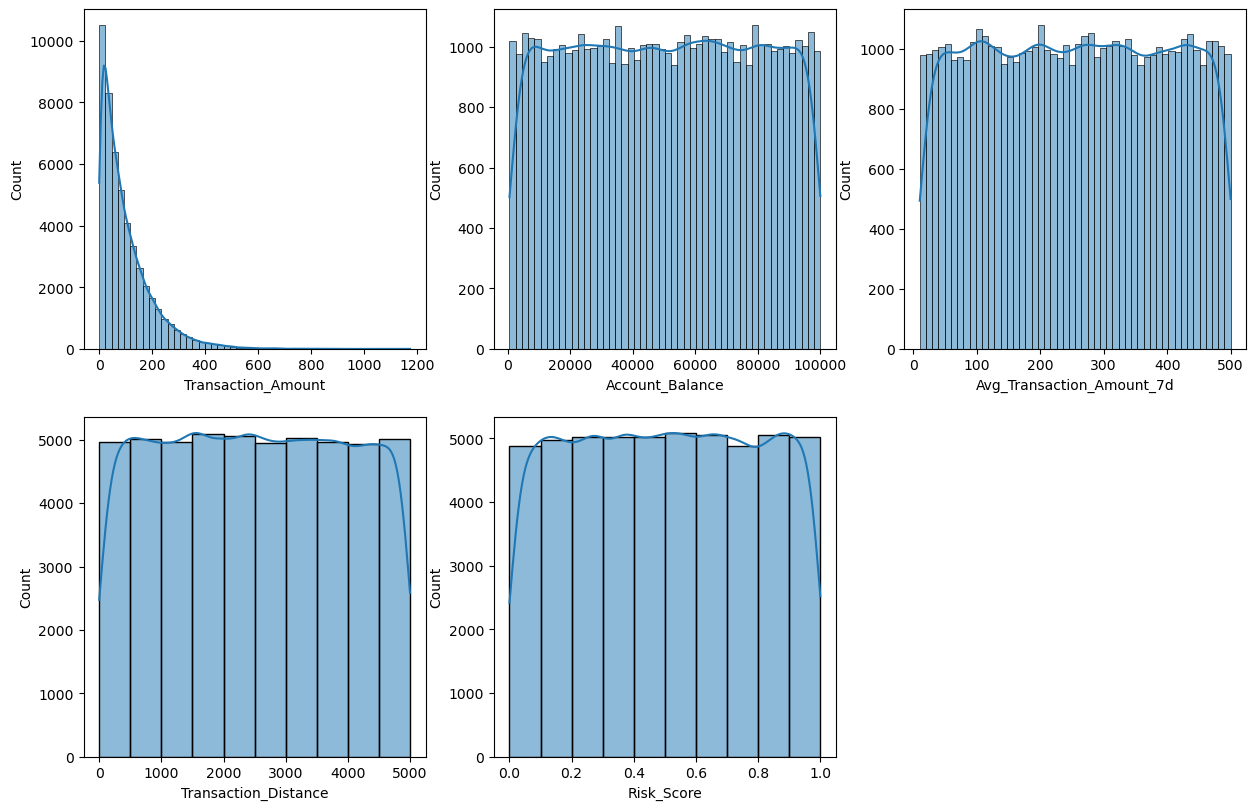

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.histplot(data["Transaction_Amount"],bins=50,kde=True)
plt.subplot(3,3,2)
sns.histplot(data["Account_Balance"],bins=50,kde=TabError)
plt.subplot(3,3,3)
sns.histplot(data["Avg_Transaction_Amount_7d"],bins=50,kde=True)
plt.subplot(3,3,4)
sns.histplot(data["Transaction_Distance"],bins=10,kde=True)
plt.subplot(3,3,5)
sns.histplot(data["Risk_Score"],bins=10,kde=True)

In [13]:
data.drop(["Merchant_Category","Authentication_Method","Location","Daily_Transaction_Count","Previous_Fraudulent_Activity","IP_Address_Flag","Card_Age","Is_Weekend","Avg_Transaction_Amount_7d","Account_Balance","Transaction_Distance","Transaction_Amount"],axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import OneHotEncoder 

encode_Transaction_Type=OneHotEncoder(sparse_output=False)
encode_Device_Type=OneHotEncoder(sparse_output=False)
encode_Location=OneHotEncoder(sparse_output=False)
encode_Merchant_Category=OneHotEncoder(sparse_output=False)
encode_Card_Type=OneHotEncoder(sparse_output=False)
encode_Authentication_Method=OneHotEncoder(sparse_output=False)

data=pd.concat([data.drop(["Transaction_Type"],axis=1),pd.DataFrame(encode_Transaction_Type.fit_transform(data[["Transaction_Type"]]),columns=encode_Transaction_Type.get_feature_names_out())],axis=1)
data=pd.concat([data.drop(["Device_Type"],axis=1),pd.DataFrame(encode_Device_Type.fit_transform(data[["Device_Type"]]),columns=encode_Device_Type.get_feature_names_out())],axis=1)
#data=pd.concat([data.drop(["Location"],axis=1),pd.DataFrame(encode_Location.fit_transform(data[["Location"]]),columns=encode_Location.get_feature_names_out())],axis=1)
#data=pd.concat([data.drop(["Merchant_Category"],axis=1),pd.DataFrame(encode_Merchant_Category.fit_transform(data[["Merchant_Category"]]),columns=encode_Merchant_Category.get_feature_names_out())],axis=1)
data=pd.concat([data.drop(["Card_Type"],axis=1),pd.DataFrame(encode_Card_Type.fit_transform(data[["Card_Type"]]),columns=encode_Card_Type.get_feature_names_out())],axis=1)
#data=pd.concat([data.drop(["Authentication_Method"],axis=1),pd.DataFrame(encode_Authentication_Method.fit_transform(data[["Authentication_Method"]]),columns=encode_Authentication_Method.get_feature_names_out())],axis=1)
data.head()

,Failed_Transaction_Count_7d,Risk_Score,Fraud_Label,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Online,Transaction_Type_POS,Device_Type_Laptop,Device_Type_Mobile,Device_Type_Tablet,Card_Type_Amex,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa
0,3,0.8494,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4,0.0959,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4,0.8400,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,0.7935,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0.3819,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


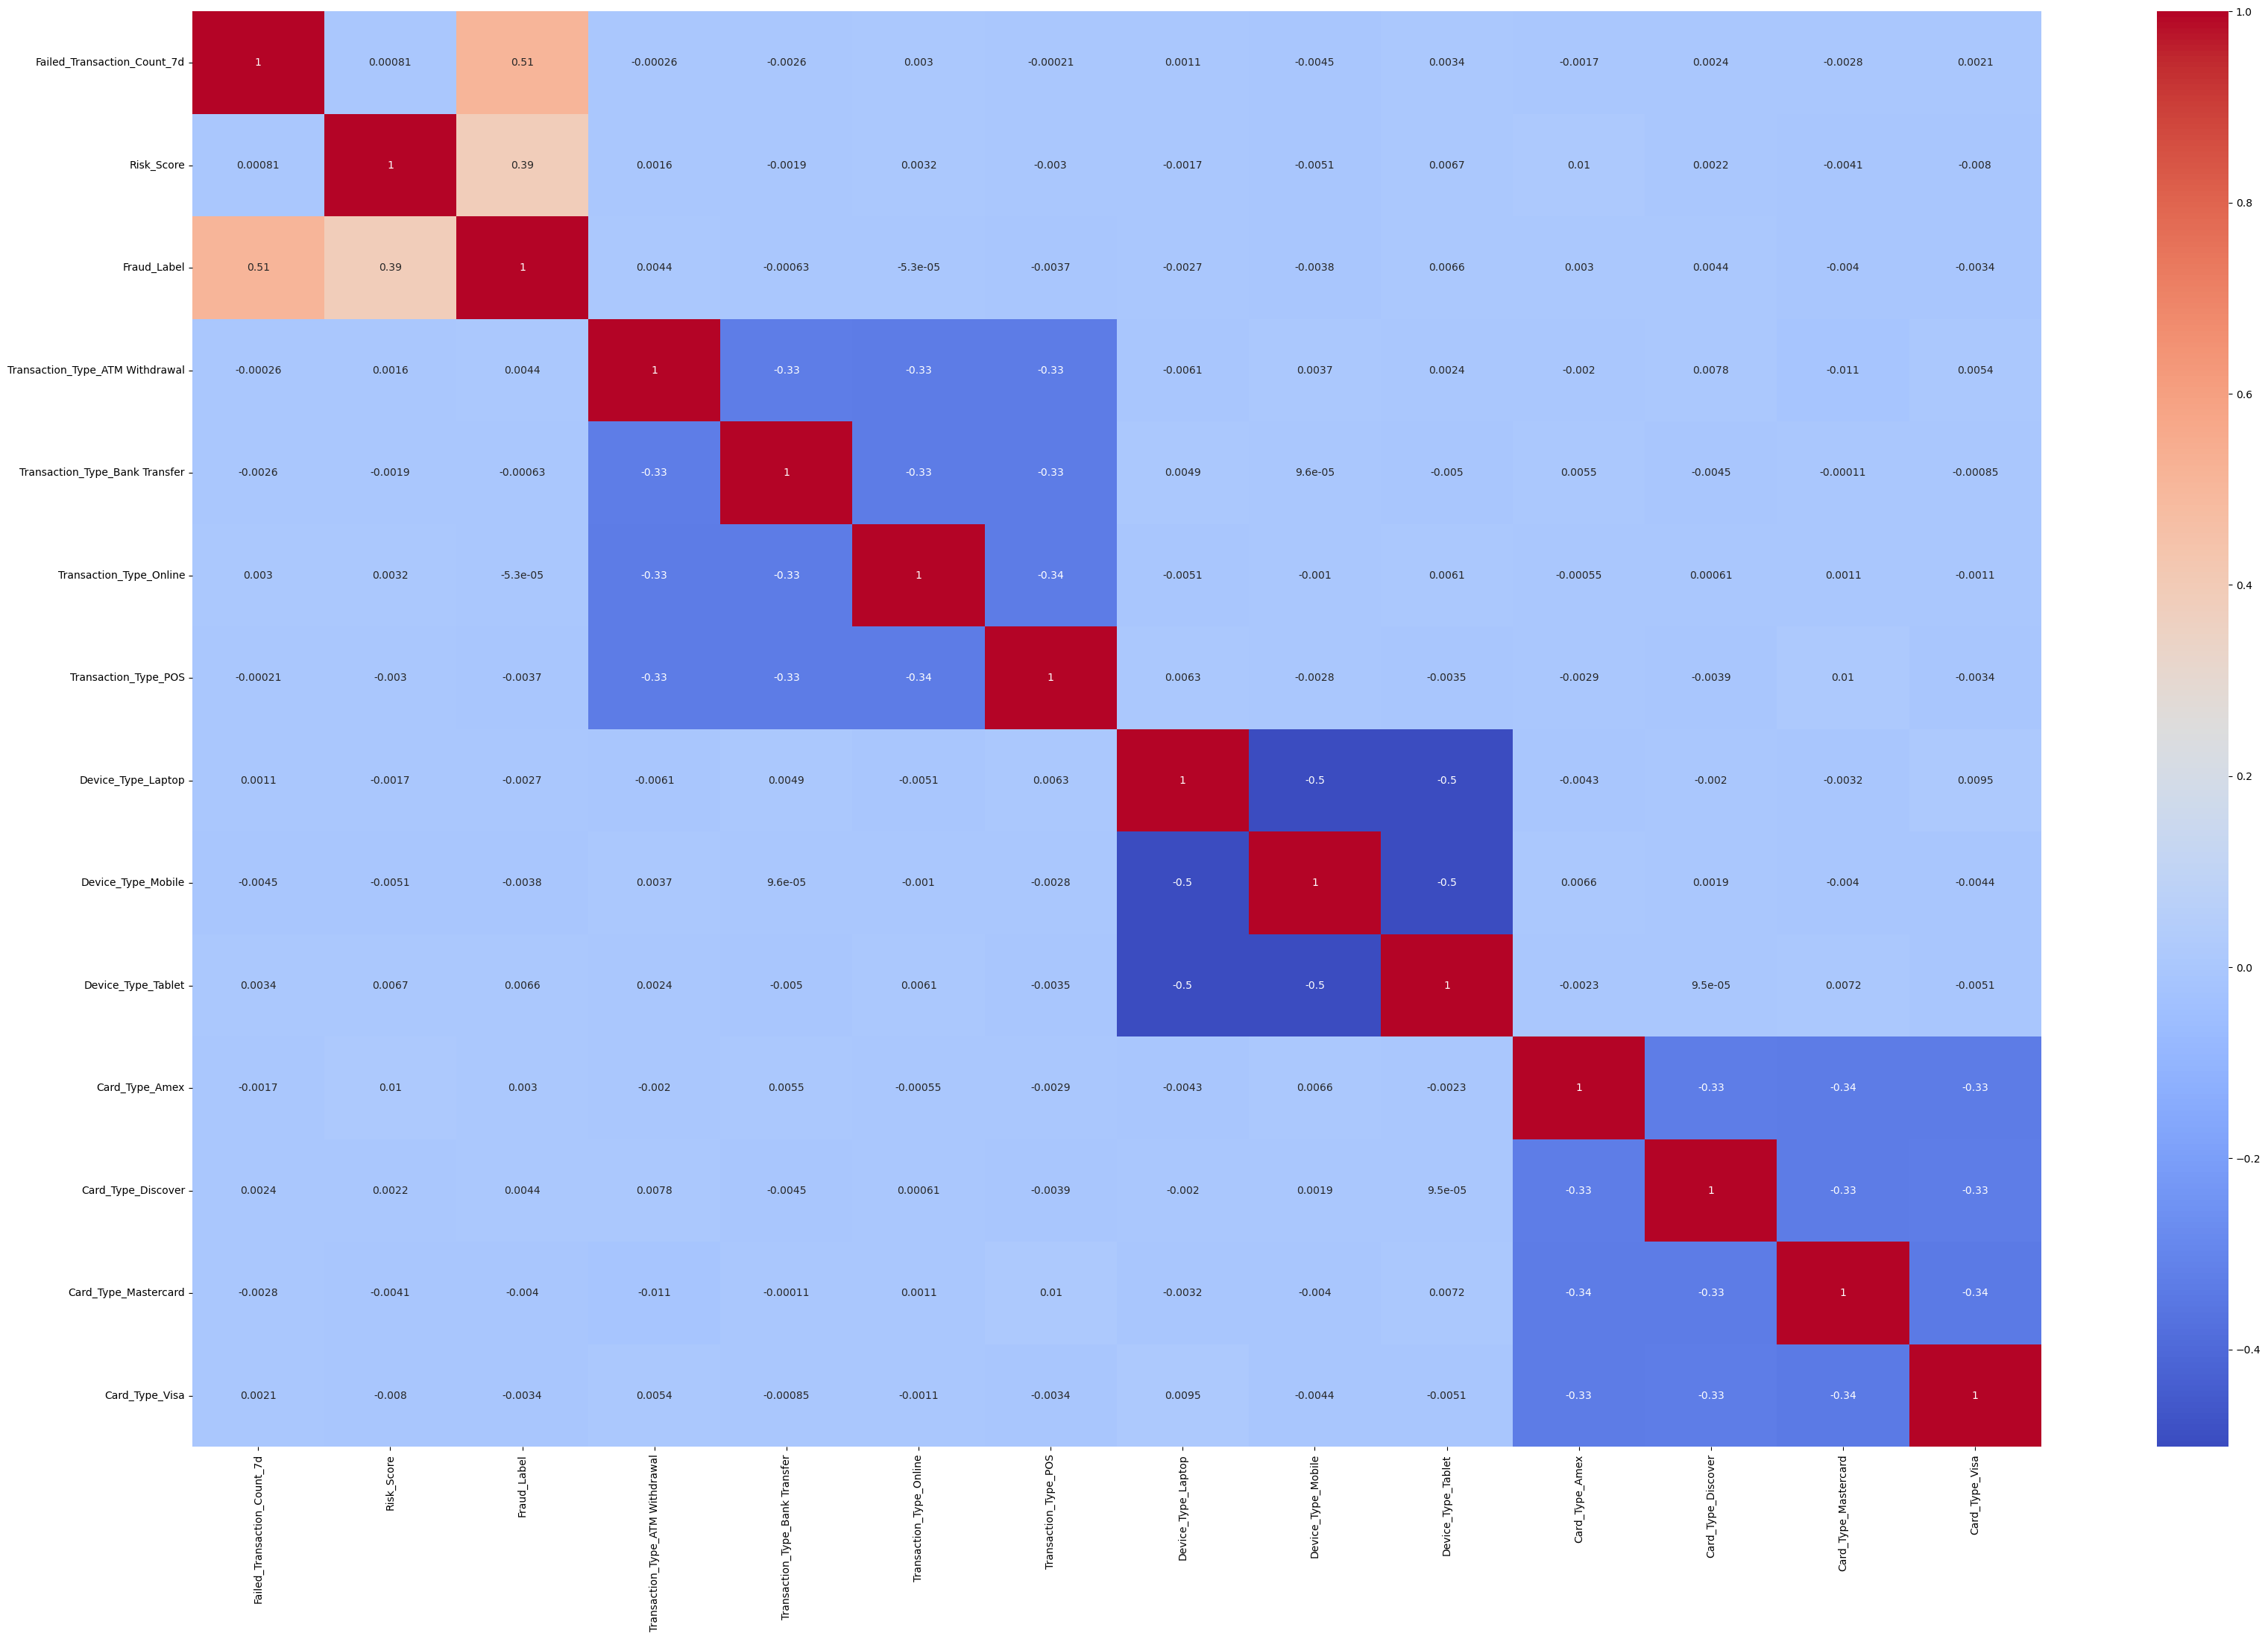

In [15]:
corr=data.corr()
plt.figure(figsize=(40,25))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [16]:
data["Fraud_Label"].value_counts()

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

In [17]:
x=data.drop(["Fraud_Label"],axis=1)
y=data["Fraud_Label"]

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [19]:
train_y.value_counts()

Fraud_Label
0    27256
1    12744
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
sampling=SMOTE()

sampled_train_x,sampled_train_y=sampling.fit_resample(train_x,train_y)

In [21]:
sampled_train_y.value_counts()

Fraud_Label
0    27256
1    27256
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(train_x)
scale_train_x=scale.transform(sampled_train_x)
scale_test_x=scale.transform(test_x)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [25]:
def get_metrics(actual,predicted):
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted)
    rc=recall_score(actual,predicted)
    f1=f1_score(actual,predicted)
    roc=roc_auc_score(actual,predicted)
    return acc,cf,pr,rc,f1,roc

In [26]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "SVC":SVC()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(scale_train_x,sampled_train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(sampled_train_y,train_pred)
    test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(test_y,test_pred)

    print(list(models.keys())[i])
    print("*"*30)
    print("Training data:")
    print("-"*30)
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr)
    print("recall score:",train_rc)
    print("f1-score:",train_f1)
    print("roc auc score:",train_roc)
    print("-"*60)
    print("Training data:")
    print("-"*30)
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr)
    print("recall score:",test_rc)
    print("f1-score:",test_f1)
    print("roc auc score:",test_roc)
    print("="*60)
    print("\n")


LogisticRegression
******************************
Training data:
------------------------------
accuracy score: 0.8032726739066628
confusion matrix:
 [[21724  5532]
 [ 5192 22064]]
precision score: 0.7995361646615452
recall score: 0.8095098326973877
f1-score: 0.8044920877998979
roc auc score: 0.8032726739066628
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 0.8093
confusion matrix:
 [[5372 1305]
 [ 602 2721]]
precision score: 0.6758569299552906
recall score: 0.8188383990370147
f1-score: 0.7405089127772486
roc auc score: 0.81169567098773


DecisionTreeClassifier
******************************
Training data:
------------------------------
accuracy score: 1.0
confusion matrix:
 [[27256     0]
 [    0 27256]]
precision score: 1.0
recall score: 1.0
f1-score: 1.0
roc auc score: 1.0
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 1.0
confusion 

In [27]:
rf=RandomForestClassifier()
rf.fit(scale_train_x,sampled_train_y)
features=pd.Series(data.columns)

feature_imp=pd.DataFrame()
feature_imp["features"]=pd.Series(data.columns)
feature_imp["imp"]=pd.Series(rf.feature_importances_)

feature_imp.sort_values(by="imp",ascending=False).reset_index(drop=True)

,features,imp
0,Failed_Transaction_Count_7d,0.548908
1,Risk_Score,0.449546
2,Transaction_Type_ATM Withdrawal,0.000175
3,Device_Type_Laptop,0.000165
4,Transaction_Type_Bank Transfer,0.000160
5,Device_Type_Mobile,0.000158
6,Card_Type_Amex,0.000152
7,Transaction_Type_POS,0.000144
8,Card_Type_Discover,0.000137
9,Card_Type_Mastercard,0.000119


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [29]:
%%time
svc=SVC()
kernel=['linear','poly','rbf','sigmoid']
degree=[3,4]

params_svc=dict(kernel=kernel,degree=degree)


svc_tun=RandomizedSearchCV(estimator=svc,param_distributions=params_svc,n_iter=20,cv=cv,n_jobs=-1,verbose=3)

svc_tun.fit(scale_train_x,sampled_train_y)

train_pred=svc_tun.predict(scale_train_x)
test_pred=svc_tun.predict(scale_test_x)

train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(sampled_train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(test_y,test_pred)

print("svc hyperparameter tunning")
print("*"*30)
print("Training data:")
print("-"*30)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1-score:",train_f1)
print("roc auc score:",train_roc)
print("-"*60)
print("Training data:")
print("-"*30)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1-score:",test_f1)
print("roc auc score:",test_roc)
print("="*60)
print("\n")

print(svc_tun.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
svc hyperparameter tunning
******************************
Training data:
------------------------------
accuracy score: 0.9878008511887291
confusion matrix:
 [[26610   646]
 [   19 27237]]
precision score: 0.9768317612882401
recall score: 0.999302905782213
f1-score: 0.9879395709026279
roc auc score: 0.987800851188729
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 0.9866
confusion matrix:
 [[6547  130]
 [   4 3319]]
precision score: 0.962307915337779
recall score: 0.9987962684321396
f1-score: 0.9802126402835204
roc auc score: 0.9896632233279464


{'kernel': 'rbf', 'degree': 3}
CPU times: total: 33.6 s
Wall time: 10min 5s
